# Load Data

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
data_path = os. getcwd()[:-9] +'Data/'

In [3]:
# Binned every 15 mins, the bins are: 05, 20, 35, 50

# Data on live popularity, collected every 10min from 6am to 9pm
curpop_df = pd.read_csv(data_path+'curpop_df.csv', index_col=[0])
curpop_df = pd.read_csv(data_path+'curpop_df.csv', index_col=[0])

# Data based on photos taken from Huayi's roof.
# 0: safe. 1: unsafe. 2: not sure
image_label_df = pd.read_csv(data_path+'image_label.csv', index_col =[0])

In [4]:
curpop_df.head(3)

,current_popularity,datetime,binned
0,38,2020-04-02 15:17:00,2020-04-02 15:05:00
1,39,2020-04-02 15:27:00,2020-04-02 15:20:00
2,38,2020-04-02 15:37:00,2020-04-02 15:35:00


In [5]:
image_label_df.head(3)

,timetaken,label
0,4/2/2020 16:05,0
1,4/2/2020 16:50,0
2,4/2/2020 17:50,0


In [6]:
# convert the columns 'datetime','binned', 'timetaken' to datetime objects
curpop_df.datetime = pd.to_datetime(curpop_df.datetime)
curpop_df.binned = pd.to_datetime(curpop_df.binned)
image_label_df.timetaken =pd.to_datetime(image_label_df.timetaken)

# EDA

In [14]:
# find the live popularity for each time bin that the photos are taken
label_df=image_label_df.join(curpop_df.set_index('binned'), on='timetaken')

In [15]:
label_df.head(3)

,timetaken,label,current_popularity,datetime
0,2020-04-02 16:05:00,0,43,2020-04-02 16:13:00
1,2020-04-02 16:50:00,0,46,2020-04-02 16:53:00
1,2020-04-02 16:50:00,0,49,2020-04-02 17:03:00


<IPython.core.display.Javascript object>


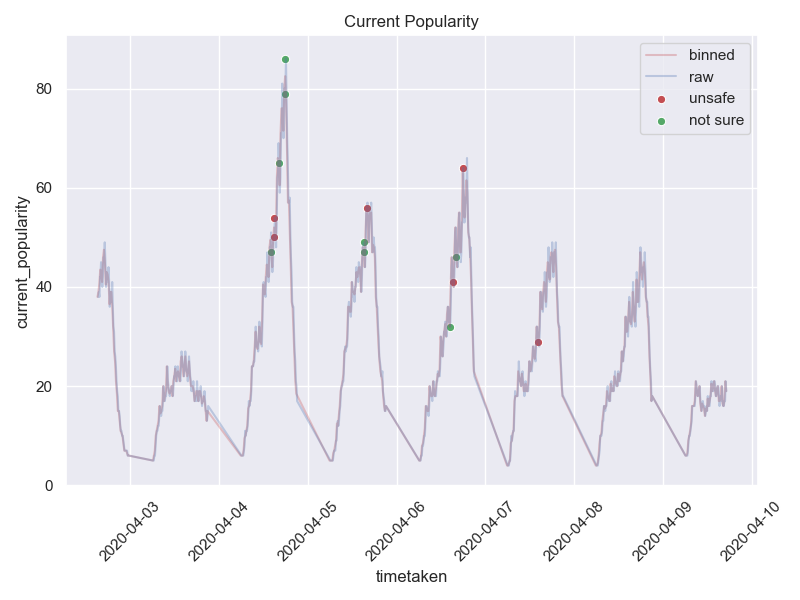

In [17]:
# plot that compare the raw timepoints with the binned result
plt.figure(figsize= [8,6])
binned_avg = curpop_df.groupby('binned').current_popularity.mean() # average over the bin
f = sns.lineplot(curpop_df.binned.unique(), binned_avg, color = 'r', alpha = 0.3) # binned
g = sns.lineplot(curpop_df.datetime, curpop_df.current_popularity, color = 'b', alpha = 0.3) # raw timestamps
u = sns.scatterplot(label_df.timetaken[label_df.label==1], label_df.current_popularity[label_df.label==1], color = 'r') #
l = sns.scatterplot(label_df.timetaken[label_df.label==2], label_df.current_popularity[label_df.label==2], color = 'g') #
plt.xticks(rotation=45)
plt.title('Current Popularity')
plt.legend(['binned', 'raw', 'unsafe', 'not sure'])
plt.tight_layout()
plt.show()